## Decision tree classifier cheat sheet

In [1]:
import pandas as pd
from sklearn.datasets import load_breast_cancer

In [2]:
# load data from scikit-learn
data = load_breast_cancer()
df = pd.DataFrame(data=data["data"],columns = data["feature_names"])

In [3]:
# this is clean and prepared dataset to predict if person might have cancer or not, generally you don't need to 
# get to know each feature, these are some complicated measurements related to cancer, the goal of this notebook
# is to make cheat sheet for DecisionTreeClassifier
df

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst radius,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension
0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.30010,0.14710,0.2419,0.07871,...,25.380,17.33,184.60,2019.0,0.16220,0.66560,0.7119,0.2654,0.4601,0.11890
1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.08690,0.07017,0.1812,0.05667,...,24.990,23.41,158.80,1956.0,0.12380,0.18660,0.2416,0.1860,0.2750,0.08902
2,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.19740,0.12790,0.2069,0.05999,...,23.570,25.53,152.50,1709.0,0.14440,0.42450,0.4504,0.2430,0.3613,0.08758
3,11.42,20.38,77.58,386.1,0.14250,0.28390,0.24140,0.10520,0.2597,0.09744,...,14.910,26.50,98.87,567.7,0.20980,0.86630,0.6869,0.2575,0.6638,0.17300
4,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.19800,0.10430,0.1809,0.05883,...,22.540,16.67,152.20,1575.0,0.13740,0.20500,0.4000,0.1625,0.2364,0.07678
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
564,21.56,22.39,142.00,1479.0,0.11100,0.11590,0.24390,0.13890,0.1726,0.05623,...,25.450,26.40,166.10,2027.0,0.14100,0.21130,0.4107,0.2216,0.2060,0.07115
565,20.13,28.25,131.20,1261.0,0.09780,0.10340,0.14400,0.09791,0.1752,0.05533,...,23.690,38.25,155.00,1731.0,0.11660,0.19220,0.3215,0.1628,0.2572,0.06637
566,16.60,28.08,108.30,858.1,0.08455,0.10230,0.09251,0.05302,0.1590,0.05648,...,18.980,34.12,126.70,1124.0,0.11390,0.30940,0.3403,0.1418,0.2218,0.07820
567,20.60,29.33,140.10,1265.0,0.11780,0.27700,0.35140,0.15200,0.2397,0.07016,...,25.740,39.42,184.60,1821.0,0.16500,0.86810,0.9387,0.2650,0.4087,0.12400


In [4]:
# define X - independent variables, y - dependent variables
X = df
y = data["target"]

In [5]:
# import function for spliting data into training set and testing set
from sklearn.model_selection import train_test_split
train_X, test_X, train_y, test_y = train_test_split(X,y)

In [6]:
from sklearn.tree import DecisionTreeClassifier

In [7]:
tree = DecisionTreeClassifier(random_state=1)

In [8]:
# training the model
tree.fit(train_X,train_y)

DecisionTreeClassifier(random_state=1)

In [9]:
# decision tree visualization
from sklearn.tree import plot_tree
import matplotlib.pyplot as plt

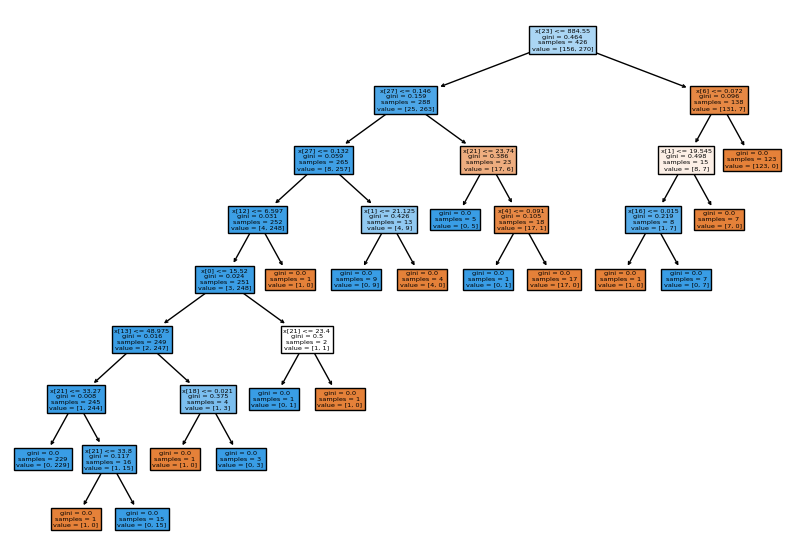

In [10]:
plt.figure(figsize = (10,7))
plot_tree(tree,filled=True)
plt.show()

In [11]:
prediction = tree.predict(test_X)

#### Model evaluation

In [12]:
# prediction on training data
training_pred = tree.predict(train_X)

In [13]:
# calculate accuracy - what % of guesses were right
from sklearn.metrics import accuracy_score
print(f"Accuracy on testing data: {accuracy_score(prediction,test_y)}")
print(f"Accuracy on training data: {accuracy_score(training_pred,train_y)}")

Accuracy on testing data: 0.9440559440559441
Accuracy on training data: 1.0


The result suggests overfitting

In [14]:
# calculate precision score - what % of "positive" guesses were right -  "true positive"/("true positive"+"false positive")
from sklearn.metrics import precision_score
precision_score(prediction,test_y)

0.9655172413793104

In [15]:
# calculate recall score - what % of "ture positive" guesses were found - "true positive"/("true positive"+"false negative")
from sklearn.metrics import recall_score
recall_score(prediction,test_y)

0.9438202247191011

In [16]:
# calculate F1 score - balance between precision and recall - 2 * (precision * recall) / (precision + recall)
from sklearn.metrics import f1_score
f1_score(prediction,test_y)

0.9545454545454545

In [17]:
# display confusion matrix - columns(actual values) = positive, negative - rows(predicted values) = positive, negative
from sklearn.metrics import confusion_matrix
confusion_matrix(prediction,test_y)

array([[51,  3],
       [ 5, 84]], dtype=int64)

In [18]:
# summary report includin precision, recall, F1 score, support(amount of samples for each class(1 or 0 )),
# accuracy, macro avg (avarage of precision or recall or f1-score reults for 1 and 0), weighted avg (weighted avarage
# where weight is based on amount of samples for each class)
from sklearn.metrics import classification_report
pd.DataFrame(classification_report(prediction,test_y,output_dict=True))

,0,1,accuracy,macro avg,weighted avg
precision,0.910714,0.965517,0.944056,0.938116,0.944822
recall,0.944444,0.943820,0.944056,0.944132,0.944056
f1-score,0.927273,0.954545,0.944056,0.940909,0.944247
support,54.000000,89.000000,0.944056,143.000000,143.000000


After the model is evaluated, we might try to improve it by experimenting with hyperparameters

In [19]:
# current depth is 6
tree.get_depth()

8

In [20]:
# let's see the results for one depth less
tree_2 = DecisionTreeClassifier(max_depth=5,random_state=1)

In [21]:
tree_2.fit(train_X,train_y)

DecisionTreeClassifier(max_depth=5, random_state=1)

In [22]:
pred_2 = tree_2.predict(test_X)

In [23]:
pd.DataFrame(classification_report(pred_2,test_y,output_dict=True))

,0,1,accuracy,macro avg,weighted avg
precision,0.910714,0.977011,0.951049,0.943863,0.952440
recall,0.962264,0.944444,0.951049,0.953354,0.951049
f1-score,0.935780,0.960452,0.951049,0.948116,0.951308
support,53.000000,90.000000,0.951049,143.000000,143.000000


It seems like the model with lower max_depth performs better, it might indicate that previous model was more overfit

#### Bias and variance of new model

In [24]:
# evaluating predictions on training data
pred_2_training = tree_2.predict(train_X)

In [25]:
pd.DataFrame(classification_report(pred_2_training,train_y,output_dict=True))

,0,1,accuracy,macro avg,weighted avg
precision,0.987179,0.996296,0.992958,0.991738,0.992979
recall,0.993548,0.992620,0.992958,0.993084,0.992958
f1-score,0.990354,0.994455,0.992958,0.992404,0.992963
support,155.000000,271.000000,0.992958,426.000000,426.000000


As we can see compared to the first model accuracy of predictions on training data has lowered, so the bias increased, and we had better results for testing data than in first model, so the variance lowered. This is the goal of model selection, to find balance between bias and variance.

Let's just play with other parameters and measure different performances

In [26]:
# list of hyperparamaters (parameters that are not learnt by model, also called tuning parameters)
tree.get_params()

{'ccp_alpha': 0.0,
 'class_weight': None,
 'criterion': 'gini',
 'max_depth': None,
 'max_features': None,
 'max_leaf_nodes': None,
 'min_impurity_decrease': 0.0,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'min_weight_fraction_leaf': 0.0,
 'random_state': 1,
 'splitter': 'best'}

In [27]:
# creating decision tree classifier models with different hyperparameters
tree_3 = DecisionTreeClassifier(criterion="entropy",random_state=1).fit(train_X,train_y)
tree_4 = DecisionTreeClassifier(max_depth=4,random_state=1).fit(train_X,train_y)
tree_5 = DecisionTreeClassifier(min_samples_split=5,random_state=1).fit(train_X,train_y)
tree_6 = DecisionTreeClassifier(criterion="entropy",max_depth=4,min_samples_split=5,random_state=1).fit(train_X,train_y)

In [28]:
pred_3 = tree_3.predict(test_X)
pred_4 = tree_4.predict(test_X)
pred_5 = tree_5.predict(test_X)
pred_6 = tree_6.predict(test_X)

Displaying reports for different tree evaluation

In [29]:
pd.DataFrame(classification_report(pred_3,test_y,output_dict=True))

,0,1,accuracy,macro avg,weighted avg
precision,0.875000,0.977011,0.937063,0.926006,0.940630
recall,0.960784,0.923913,0.937063,0.942349,0.937063
f1-score,0.915888,0.949721,0.937063,0.932804,0.937654
support,51.000000,92.000000,0.937063,143.000000,143.000000


In [30]:
pd.DataFrame(classification_report(pred_4,test_y,output_dict=True))

,0,1,accuracy,macro avg,weighted avg
precision,0.910714,0.988506,0.958042,0.949610,0.960218
recall,0.980769,0.945055,0.958042,0.962912,0.958042
f1-score,0.944444,0.966292,0.958042,0.955368,0.958348
support,52.000000,91.000000,0.958042,143.000000,143.000000


In [31]:
pd.DataFrame(classification_report(pred_5,test_y,output_dict=True))

,0,1,accuracy,macro avg,weighted avg
precision,0.910714,0.965517,0.944056,0.938116,0.944822
recall,0.944444,0.943820,0.944056,0.944132,0.944056
f1-score,0.927273,0.954545,0.944056,0.940909,0.944247
support,54.000000,89.000000,0.944056,143.000000,143.000000


In [32]:
pd.DataFrame(classification_report(pred_6,test_y,output_dict=True))

,0,1,accuracy,macro avg,weighted avg
precision,0.892857,0.988506,0.951049,0.940681,0.954393
recall,0.980392,0.934783,0.951049,0.957587,0.951049
f1-score,0.934579,0.960894,0.951049,0.947737,0.951509
support,51.000000,92.000000,0.951049,143.000000,143.000000


Overall tree_2 seems to be the best model

### Evaluation using Cross-validation

In [33]:
from sklearn.model_selection import cross_val_score, cross_validate

Using cross_val_score function

In [34]:
# evaluating multiple models with different max_depth hyperparameter
depth_range = range(1,10)
folds = 10
accuracy_scores = {}

for depth in depth_range:
    accuracy_scores[depth] = (cross_val_score(DecisionTreeClassifier(max_depth=depth),X,y,cv=folds,scoring="accuracy").mean())

In [35]:
# cross_val_score can use only one evaluation metric
accuracy_scores

{1: 0.8928884711779448,
 2: 0.9209899749373432,
 3: 0.9139724310776941,
 4: 0.9157894736842105,
 5: 0.9157894736842105,
 6: 0.9121867167919799,
 7: 0.906954887218045,
 8: 0.9138784461152882,
 9: 0.9174498746867167}

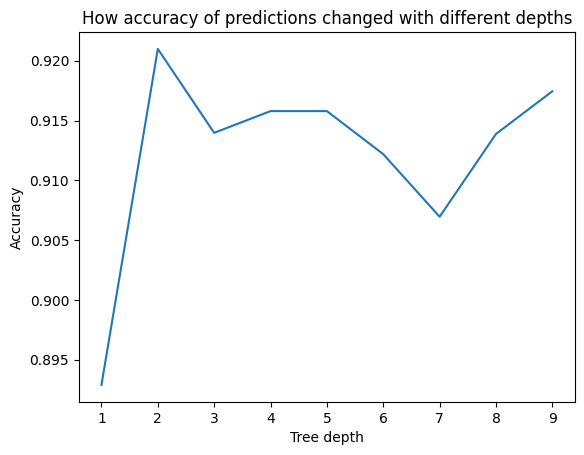

In [36]:
plt.plot(depth_range,accuracy_scores.values())
plt.title("How accuracy of predictions changed with different depths")
plt.xlabel("Tree depth")
plt.ylabel("Accuracy")

plt.show()

Using cross_validate function

In [37]:
# cross_validation allows using multiple metrics at the same time, also it let's us compare evaluation of model on testing
# and training data 
scores = {}
for depth in depth_range:
    scores[depth] = cross_validate(DecisionTreeClassifier(max_depth=depth)
                                   ,X, y, cv=10, scoring = ["accuracy","precision","recall","f1"],return_train_score=True)    

In [38]:
scores[1]

{'fit_time': array([0.00498629, 0.00498652, 0.00598264, 0.00797963, 0.0079782 ,
        0.00598454, 0.00698113, 0.00698161, 0.00398922, 0.00598454]),
 'score_time': array([0.01097035, 0.00698137, 0.01097131, 0.01196766, 0.02544332,
        0.02792501, 0.00997376, 0.01196694, 0.0089767 , 0.00897598]),
 'test_accuracy': array([0.87719298, 0.85964912, 0.89473684, 0.84210526, 0.92982456,
        0.9122807 , 0.87719298, 0.9122807 , 0.87719298, 0.94642857]),
 'train_accuracy': array([0.92382812, 0.9296875 , 0.92578125, 0.92773438, 0.921875  ,
        0.92382812, 0.92382812, 0.91992188, 0.92382812, 0.92007797]),
 'test_precision': array([0.83333333, 0.82926829, 0.89473684, 0.81395349, 0.9       ,
        0.94285714, 0.85365854, 0.94285714, 1.        , 0.92105263]),
 'train_precision': array([0.9031339 , 0.92307692, 0.91495601, 0.92261905, 0.91445428,
        0.90988372, 0.91715976, 0.9516129 , 0.94620253, 0.91202346]),
 'test_recall': array([1.        , 0.97142857, 0.94444444, 0.97222222, 1. 

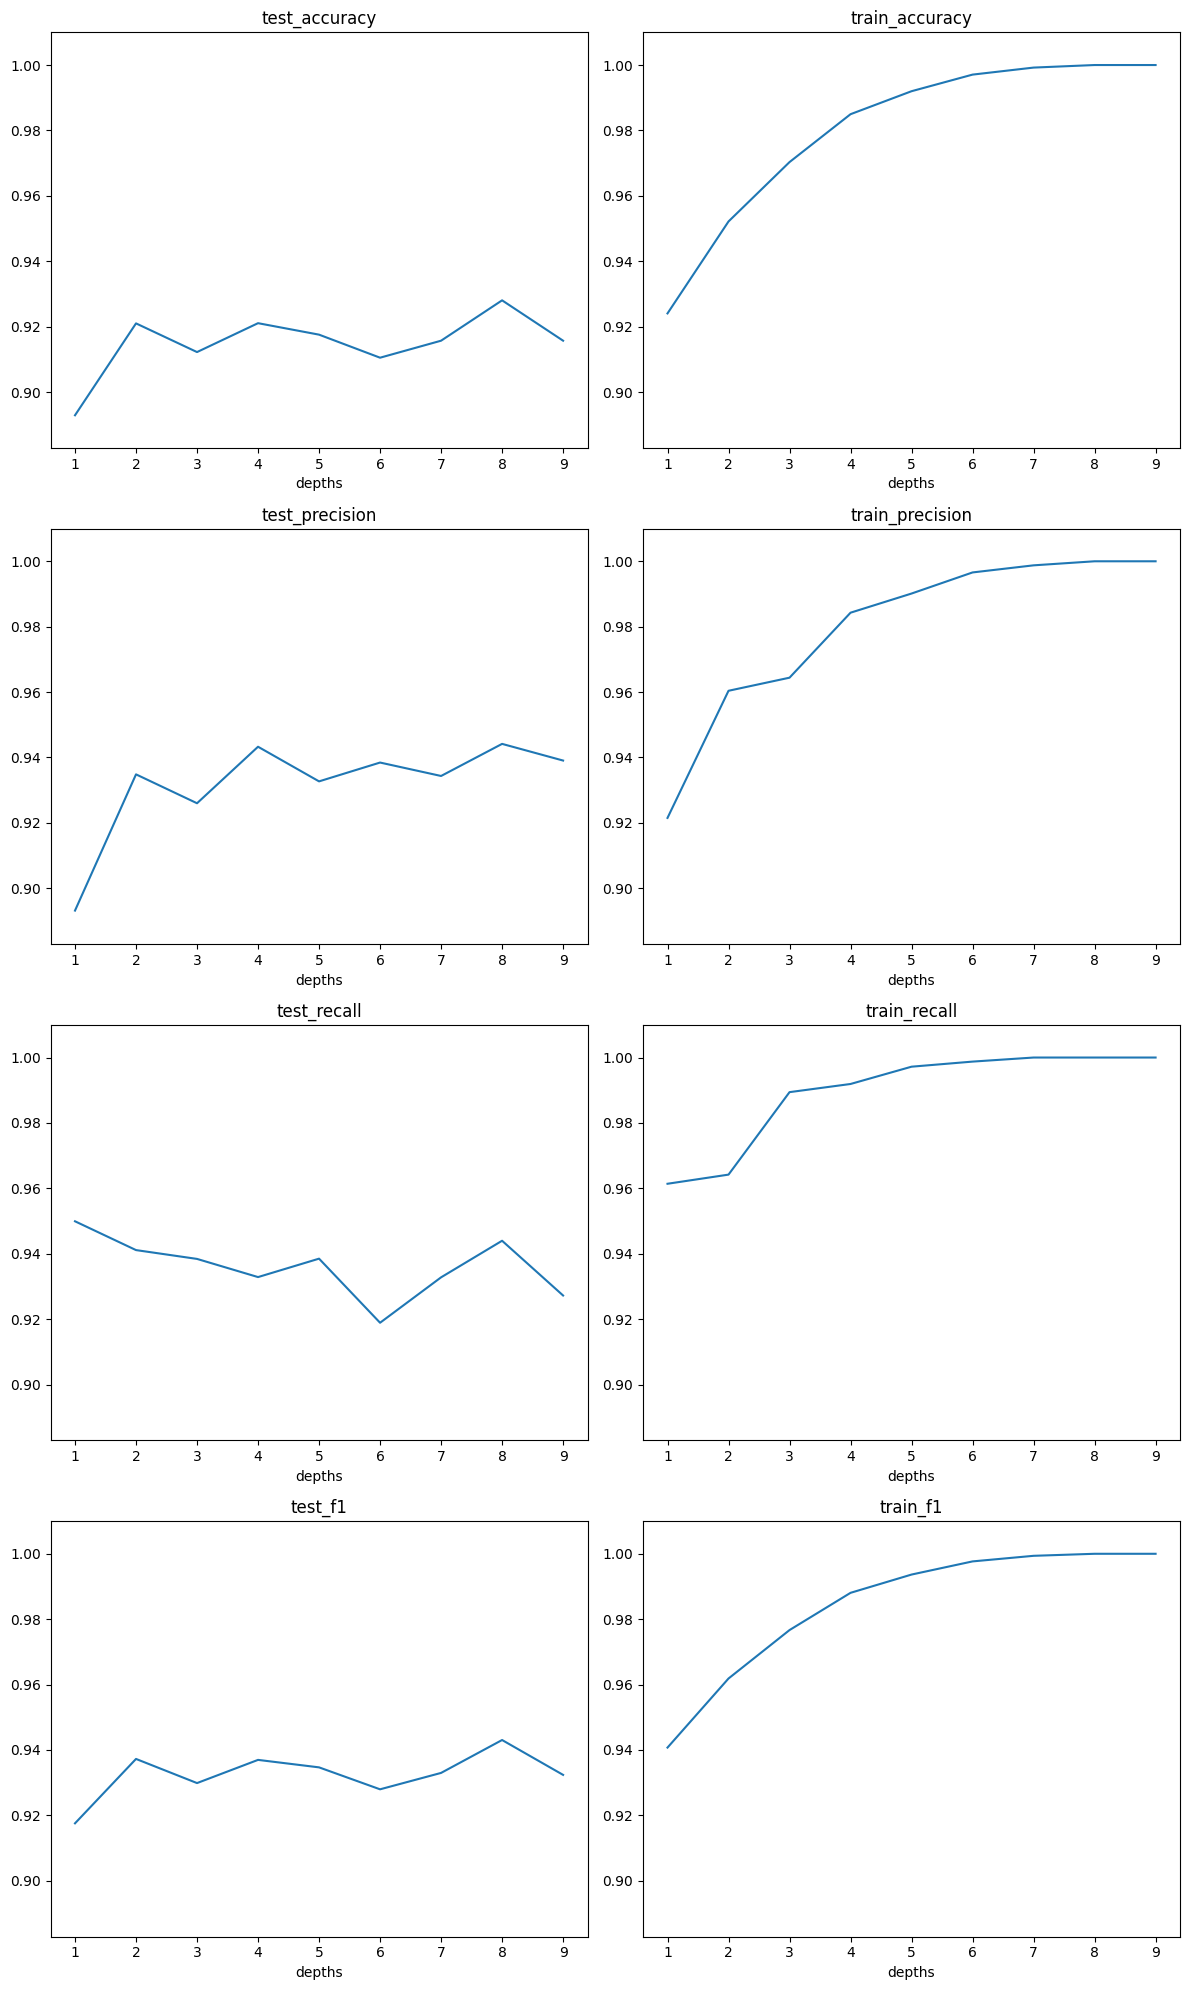

In [39]:
fig,ax = plt.subplots(4,2,figsize = (12,20))

all_values = []

ax_x = 0
ax_y = 0
# aggregating data from different depth models
for score in list(scores[1].keys())[2:]:
    store_scores = []
    for model in scores.values():
        store_scores.append(model[score].mean())
       
    
    ax[ax_x,ax_y].plot(range(1,folds),store_scores)
    ax[ax_x,ax_y].title.set_text(score)
    ax[ax_x,ax_y].set_xlabel("depths")
    
    all_values.extend(store_scores)
    
    if ax_y == 1:
        ax_y = 0
        ax_x+=1
    else:
        ax_y+=1
    
ax_x = 0
ax_y = 0    
    
# limit plot scope to minimum and maxium evaluation metrics gathered in previous process    
for _ in range(len(list(scores[1].keys())[2:])):
    
    ax[ax_x,ax_y].set_ylim(min(all_values)-0.01,max(all_values)+0.01)
    
    if ax_y == 1:
        ax_y = 0
        ax_x+=1
    else:
        ax_y+=1
         
plt.tight_layout()    
plt.show()
 